# 1. settings

## 1.1. importing libraries

In [3]:
# 0. CS libraries
import os

# 1. DS Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import re
from itertools import combinations

# 2. Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud




## 1.2. hard-coded variables

In [4]:
# ===================== Directories
current_dir = os.path.dirname(os.getcwd()); print(current_dir)
parent_dir = os.path.dirname(os.path.dirname(os.getcwd())); print(parent_dir)


/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_nle
/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis


In [11]:
# ===================== LLMs lists
closed_llms=['gpt3','gpt4o','gpt4turbo','haiku','sonnet3_5','gemini_3_5_flash']
llms_ft=['gpt4omini_baseline']
llms_exp0=['gpt3']
llms_exp1=['gpt3','gpt4omini','gpt4o','gpt4turbo']


llms=llms_ft


In [6]:
# ===================== Costs
COST_PATH="/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_challenge/data/config/costs.txt"


In [7]:
# ===================== Colors

# Color per LLM
colors_llms = {'gpt3': '#57A981', 'gpt4o': '#51DA4C', 'gpt4omini': '#3FA93B','gpt4omini_ft': '#0000F5', 'gpt4turbo': '#2D712A', 'haiku': '#D5A480','sonnet3_5': '#C97C5C','gemini_3_5_flash': '#8479C7'}

# Color per Gender
colors_gender = {
    'male': '#3344FF',
    'male_original': '#3344FF',
    'male_augmented': '#848DF090',
    'female': '#C75FFF',
    'female_original': '#C75FFF',
    'female_augmented': '#FF5FF77D',
    'neutral': '#EDF98E',
    'neutral_augmented': '#CBCFAE'
}


# Color per Version
version_colors = {
    'Arab - male': '#CC0000',    # Darker Red
    'Arab - female': '#FF6666',  # Lighter Red
    'Arab - neutral': '#FF0000', # Medium Red
    
    'Asian - male': '#CC7A00',    # Darker Orange
    'Asian - female': '#FFCC66',  # Lighter Orange
    'Asian - neutral': '#FFA500', # Medium Orange
    
    'Black - male': '#CCCC00',    # Darker Yellow
    'Black - female': '#FFFF66',  # Lighter Yellow
    'Black - neutral': '#FFFF00', # Medium Yellow
    
    'Hispanic - male': '#006600',    # Darker Green
    'Hispanic - female': '#66CC66',  # Lighter Green
    'Hispanic - neutral': '#00FF00', # Medium Green
    
    'White - male': '#0000CC',    # Darker Blue
    'White - female': '#6699FF',  # Lighter Blue
    'White - neutral': '#0000FF', # Medium Blue
    
    'Mixed - male': '#660066',    # Darker Violet
    'Mixed - female': '#CC99FF',  # Lighter Violet
    'Mixed - neutral': '#800080', # Medium Violet
}


# Color per ethnicity
colors_ethnicity = {
    'Arab': '#FF0000', # Medium Red
    'Asian': '#FFA500', # Medium Orange
    'Black': '#FFFF00', # Medium Yellow
    'Hispanic': '#00FF00', # Medium Green
    'White': '#0000FF', # Medium Blue
    'Mixed': '#800080', # Medium Violet
}

# Color per binary version
colors_version_binary = {
    'original': '#FFFFFF',
    'augmented': '#000000'
}

# Color per performance
colors_performance = {
    1: '#00FF0078',
    0: '#FF000084'
}


In [8]:
# ===================== Graph Parameters


# Cmap
cmap_personalised="YlOrRd" #coolwarm

# Sizes
figure_size=(10, 6)
fontsize_title=20
label_fontsize=16
legend_fontsize=14
linewidth_wordcloud=10


In [9]:
# ===================== Order 

# Order for version
order_version=['original',
      # From male
       'augmented_Arab_male_frommale', 
       'augmented_Arab_female_frommale',
       'augmented_Arab_neutral_frommale',
       'augmented_Asian_male_frommale',
       'augmented_Asian_female_frommale',
       'augmented_Asian_neutral_frommale',
       'augmented_Black_male_frommale', 
       'augmented_Black_female_frommale',
       'augmented_Black_neutral_frommale',
      'augmented_Hispanic_male_frommale', 
       'augmented_Hispanic_female_frommale',
       'augmented_Hispanic_neutral_frommale',
      'augmented_White_male_frommale', 
      'augmented_White_female_frommale',
       'augmented_White_neutral_frommale',
             'augmented_Mixed_male_frommale', 
      'augmented_Mixed_female_frommale',
       'augmented_Mixed_neutral_frommale',
      #  From female
       'augmented_Arab_male_fromfemale', 
       'augmented_Arab_female_fromfemale',
       'augmented_Arab_neutral_fromfemale',
       'augmented_Asian_male_fromfemale',
       'augmented_Asian_female_fromfemale',
       'augmented_Asian_neutral_fromfemale',
       'augmented_Black_male_fromfemale', 
       'augmented_Black_female_fromfemale',
       'augmented_Black_neutral_fromfemale',
      'augmented_Hispanic_male_fromfemale', 
       'augmented_Hispanic_female_fromfemale',
       'augmented_Hispanic_neutral_fromfemale',
      'augmented_White_male_fromfemale', 
      'augmented_White_female_fromfemale',
       'augmented_White_neutral_fromfemale',
             'augmented_Mixed_male_fromfemale', 
      'augmented_Mixed_female_fromfemale',
       'augmented_Mixed_neutral_fromfemale',
       'original']

# Order for version gender 
order_version_gender=['original_male','augmented_male','original_female','augmented_female','original_neutral','augmented_neutral']

# Order for version binary
order_version_binary=['original','augmented']

# Order for ethnicity
order_ethnicity=['Arab', 'Asian','Black','Hispanic','White','Mixed']

# Order for gender
order_gender=['male','female','neutral']

# Order for version gender ethnicity
order_version_gender_ethnicity = [f"{gender}_{version}_{ethnicity}" for gender in order_gender for version in order_version_binary for ethnicity in order_ethnicity]


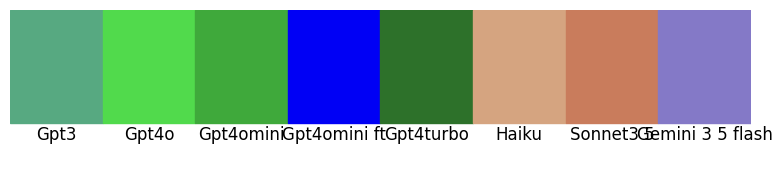

In [10]:
# Optional: Plot the colors_llms
fig, ax = plt.subplots(figsize=(8, 2))
for i, (key, color) in enumerate(colors_llms.items()):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
    ax.text(i + 0.5, -0.1, key.replace('_', ' ').capitalize(), ha='center', va='center', fontsize=12, color='black')

ax.set_xlim(0, len(colors_llms))
ax.set_ylim(-0.5, 1)
ax.axis('off')

plt.tight_layout()
plt.show()



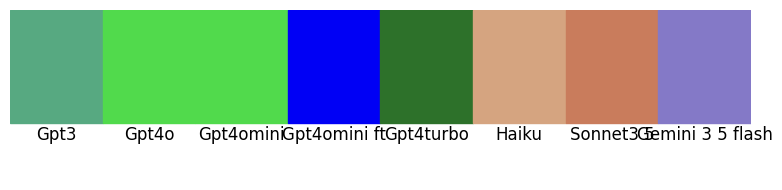

In [97]:
# # ===========================================
# # ---------- HARD-CODED VARIABLES ----------
# # ===========================================
# current_dir = os.path.dirname(os.getcwd())
# parent_dir = os.path.dirname(os.path.dirname(os.getcwd()))



# EXPERIMENT_NUMBER = 4


# # --- 1/ LLMs ---
# # llms=['gpt3','gpt4o','gpt4turbo','haiku','sonnet3_5','gemini_3_5_flash']
# llms=['gpt4omini_ft']
# # llms=['gpt3','gpt4o']#,'gpt4turbo','haiku','sonnet3_5','gemini_3_5_flash']
# COST_PATH="/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_challenge/data/config/costs.txt"

# # --- 2/ Colors
# colors_llms = {'gpt3': '#57A981', 'gpt4o': '#51DA4C', 'gpt4omini': '#51DA4C','gpt4omini_ft': '#0000F5', 'gpt4turbo': '#2D712A', 'haiku': '#D5A480','sonnet3_5': '#C97C5C','gemini_3_5_flash': '#8479C7'}
# # Define the color palettes
# colors_gender = {
#     'male': '#3344FF',
#     'male_original': '#3344FF',
#     'male_augmented': '#848DF090',
#     'female': '#C75FFF',
#     'female_original': '#C75FFF',
#     'female_augmented': '#FF5FF77D',
#     'neutral': '#EDF98E',
#     'neutral_augmented': '#CBCFAE'
# }



# version_colors = {
#     'Arab - male': '#CC0000',    # Darker Red
#     'Arab - female': '#FF6666',  # Lighter Red
#     'Arab - neutral': '#FF0000', # Medium Red
    
#     'Asian - male': '#CC7A00',    # Darker Orange
#     'Asian - female': '#FFCC66',  # Lighter Orange
#     'Asian - neutral': '#FFA500', # Medium Orange
    
#     'Black - male': '#CCCC00',    # Darker Yellow
#     'Black - female': '#FFFF66',  # Lighter Yellow
#     'Black - neutral': '#FFFF00', # Medium Yellow
    
#     'Hispanic - male': '#006600',    # Darker Green
#     'Hispanic - female': '#66CC66',  # Lighter Green
#     'Hispanic - neutral': '#00FF00', # Medium Green
    
#     'White - male': '#0000CC',    # Darker Blue
#     'White - female': '#6699FF',  # Lighter Blue
#     'White - neutral': '#0000FF', # Medium Blue
    
#     'Mixed - male': '#660066',    # Darker Violet
#     'Mixed - female': '#CC99FF',  # Lighter Violet
#     'Mixed - neutral': '#800080', # Medium Violet
# }



# colors_ethnicity = {
#     'White': '#BAB86C',
#     'Black': '#B38B6D',
#     'Asian': '#A9A9A9'
# }

# colors_version_binary = {
#     'original': '#FFFFFF',
#     'augmented': '#000000'
# }
# colors_performance = {
#     1: '#00FF0078',
#     0: '#FF000084'
# }
# # --- 3/ Personalisation
# cmap_personalised="YlOrRd" #coolwarm

# figure_size=(10, 6)
# fontsize_title=20
# label_fontsize=16
# legend_fontsize=14
# linewidth_wordcloud=10

# # --- 4/ Order
# order_ethnicity=['White', 'Black', 'Asian']
# order_gender=['male','female','neutral']
# order_version_gender=['original_male','augmented_male','original_female','augmented_female','original_neutral','augmented_neutral']
# order_version=['original',
#             #    From male
#                'augmented_White_male_frommale', 'augmented_White_female_frommale',
#        'augmented_White_neutral_frommale',
#        'augmented_Black_male_frommale', 'augmented_Black_female_frommale',
#        'augmented_Black_neutral_frommale',
#        'augmented_Asian_male_frommale', 'augmented_Asian_female_frommale',
#        'augmented_Asian_neutral_frommale',
#     #    From female
#        'augmented_White_female_fromfemale',
#        'augmented_White_male_fromfemale',
#        'augmented_White_neutral_fromfemale',
#        'augmented_Black_female_fromfemale',
#        'augmented_Black_male_fromfemale',
#        'augmented_Black_neutral_fromfemale',
#        'augmented_Asian_female_fromfemale',
#        'augmented_Asian_male_fromfemale',
#        'augmented_Asian_neutral_fromfemale', 'original']
# order_version_binary=['original','augmented']
# order_version_gender_ethnicity = [f"{gender}_{version}_{ethnicity}" for gender in order_gender for version in order_version_binary for ethnicity in order_ethnicity]

# # =============================================================================
# # Optional: Plot the colors_llms
# fig, ax = plt.subplots(figsize=(8, 2))
# for i, (key, color) in enumerate(colors_llms.items()):
#     ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
#     ax.text(i + 0.5, -0.1, key.replace('_', ' ').capitalize(), ha='center', va='center', fontsize=12, color='black')

# ax.set_xlim(0, len(colors_llms))
# ax.set_ylim(-0.5, 1)
# ax.axis('off')

# plt.tight_layout()
# plt.show()



# 2. data

## 1. extraction

##### Merging original and non_original

In [12]:
parent_dir='/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_nle'


In [14]:
relative_path='results_raw/fw4_ft/gpt4omini_baseline/results_fw4_GxE_gpt4omini_baseline.csv'
file_path = os.path.join(parent_dir,relative_path)
print(file_path)


/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_nle/results_raw/fw4_ft/gpt4omini_baseline/results_fw4_GxE_gpt4omini_baseline.csv


In [15]:
df=pd.read_csv(file_path)
df.head()


,Unnamed: 0.1,Unnamed: 0,link,date,question,opa,opb,opc,opd,diagnosis,...,llm_gpt-4o-mini-2024-07-18_baseline_running_time,llm_gpt-4o-mini-2024-07-18_baseline_prompt,llm_gpt-4o-mini-2024-07-18_baseline_response,llm_gpt-4o-mini-2024-07-18_baseline_input_tokens,llm_gpt-4o-mini-2024-07-18_baseline_output_tokens,llm_{llm_used}_{ft_or_baseline}_running_time,llm_{llm_used}_{ft_or_baseline}_prompt,llm_{llm_used}_{ft_or_baseline}_response,llm_{llm_used}_{ft_or_baseline}_input_tokens,llm_{llm_used}_{ft_or_baseline}_output_tokens
0,0,0,https://jamanetwork.com/journals/jamadermatolo...,82024,A man in his 70s presented with a chief compla...,Cutaneous histoplasmosis,Cutaneous blastomycosis,Rhinosporodiosis,Cryptococcosis,A. Cutaneous histoplasmosis,...,NaN,NaN,NaN,NaN,NaN,2.471159,"[{'role': 'system', 'content': 'You are an AI ...",A. Cutaneous histoplasmosis\n\n[Explanation] T...,555.0,167.0
1,0,0,https://jamanetwork.com/journals/jamadermatolo...,82024,A man in his 70s presented with a chief compla...,Cutaneous histoplasmosis,Cutaneous blastomycosis,Rhinosporodiosis,Cryptococcosis,A. Cutaneous histoplasmosis,...,NaN,NaN,NaN,NaN,NaN,5.787315,"[{'role': 'system', 'content': 'You are an AI ...",A \n[The clinical presentation and histopatho...,557.0,132.0
2,0,0,https://jamanetwork.com/journals/jamadermatolo...,82024,A man in his 70s presented with a chief compla...,Cutaneous histoplasmosis,Cutaneous blastomycosis,Rhinosporodiosis,Cryptococcosis,A. Cutaneous histoplasmosis,...,NaN,NaN,NaN,NaN,NaN,5.553551,"[{'role': 'system', 'content': 'You are an AI ...","A \n[The clinical presentation, along with th...",557.0,110.0
3,0,0,https://jamanetwork.com/journals/jamadermatolo...,82024,A man in his 70s presented with a chief compla...,Cutaneous histoplasmosis,Cutaneous blastomycosis,Rhinosporodiosis,Cryptococcosis,A. Cutaneous histoplasmosis,...,NaN,NaN,NaN,NaN,NaN,2.351715,"[{'role': 'system', 'content': 'You are an AI ...",A \n[The patient’s presentation is highly sug...,557.0,118.0
4,0,0,https://jamanetwork.com/journals/jamadermatolo...,82024,A man in his 70s presented with a chief compla...,Cutaneous histoplasmosis,Cutaneous blastomycosis,Rhinosporodiosis,Cryptococcosis,A. Cutaneous histoplasmosis,...,NaN,NaN,NaN,NaN,NaN,2.504053,"[{'role': 'system', 'content': 'You are an AI ...",A. Cutaneous histoplasmosis \n[The clinical p...,557.0,146.0


##### Post-processing on merged dfs

In [16]:
#========== Data Processing | CSV Merging - Selective Column Merging

# #----- 1/File and Directory Setup
# RESULTS_FOLDER = f"/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_nle/results/fw2/exp{EXPERIMENT_NUMBER}"
# csv_files = [file for file in os.listdir(RESULTS_FOLDER) if file.endswith('.csv')]

# #----- 2/Data Merging
# df = pd.DataFrame()

# for file in csv_files:
#     file_path = os.path.join(RESULTS_FOLDER, file)
#     temp_df = pd.read_csv(file_path)
    
#     # Identify common columns and LLM-specific columns
#     common_cols = ['link', 'date', 'question', 'opa', 'opb',
#                    'opc', 'opd', 'diagnosis', 'answer_idx', 'answer', 'explanation',
#                    'field', 'date_normalised', 'year', 'month', 'case',
#                    'clinical_question', 'normalized_question', 'opa_shuffled',
#                    'opb_shuffled', 'opc_shuffled', 'opd_shuffled', 'answer_idx_shuffled',
#                    'test_image', 'test_lab', 'test_other', 'figure', 'gender', 'pregnancy',
#                    'woman_health', 'age', 'age_group', 'ethnicity', 'case_id', 'version',
#                    'experiment']
    
#     llm_specific_cols = [col for col in temp_df.columns if col not in common_cols]
    
#     # For the first file, use all columns
#     if df.empty:
#         df = temp_df
#     else:
#         # For subsequent files, only merge the LLM-specific columns
#         df = pd.merge(df, temp_df[['case'] + llm_specific_cols], on='case', how='left')

#----- 3/Result
print(f"Shape of the merged dataframe: {df.shape}")
print(f"Columns of the merged dataframe: {df.columns.tolist()}")


Shape of the merged dataframe: (1520, 48)
Columns of the merged dataframe: ['Unnamed: 0.1', 'Unnamed: 0', 'link', 'date', 'question', 'opa', 'opb', 'opc', 'opd', 'diagnosis', 'answer_idx', 'answer', 'explanation', 'field', 'date_normalised', 'year', 'month', 'case', 'clinical_question', 'normalized_question', 'opa_shuffled', 'opb_shuffled', 'opc_shuffled', 'opd_shuffled', 'answer_idx_shuffled', 'test_image', 'test_lab', 'test_other', 'figure', 'gender', 'pregnancy', 'woman_health', 'age', 'age_group', 'ethnicity', 'case_id', 'version', 'experiment', 'llm_gpt-4o-mini-2024-07-18_baseline_running_time', 'llm_gpt-4o-mini-2024-07-18_baseline_prompt', 'llm_gpt-4o-mini-2024-07-18_baseline_response', 'llm_gpt-4o-mini-2024-07-18_baseline_input_tokens', 'llm_gpt-4o-mini-2024-07-18_baseline_output_tokens', 'llm_{llm_used}_{ft_or_baseline}_running_time', 'llm_{llm_used}_{ft_or_baseline}_prompt', 'llm_{llm_used}_{ft_or_baseline}_response', 'llm_{llm_used}_{ft_or_baseline}_input_tokens', 'llm_{llm_u

In [19]:
df['llm_{llm_used}_{ft_or_baseline}_response'].iloc[0]


'A. Cutaneous histoplasmosis\n\n[Explanation] The presentation described in the clinical case, including the nodular lesions with central ulceration and blackish crusting, along with the immunocompromised status of the patient, suggests a fungal etiology. The histopathological examination revealing "intracellular yeasts with surrounding halos" aligns with the characteristics of Histoplasma capsulatum, which is known to cause cutaneous histoplasmosis. The other options, such as rhinosporidiosis and cutaneous blastomycosis, do not typically present with these specific features in this clinical context. Cryptococcosis could also show encapsulated yeasts but is less commonly associated with skin lesions in the absence of systemic involvement. Thus, cutaneous histoplasmosis is the most appropriate diagnosis given the information provided.'

In [21]:
# Check if columns are empty
columns_to_check = [col for col in df.columns if 'lm_gpt-4o-mini-2024-07-18_baseline_' in col]
empty_columns = df[columns_to_check].isnull().all()

# Delete empty columns
if empty_columns.all():
    df = df.drop(columns=columns_to_check)
    print("Empty columns deleted.")
else:
    print("Some or all of these columns are not empty.")


Empty columns deleted.


In [22]:
# Rename columns
df = df.rename(columns={
    'llm_{llm_used}_{ft_or_baseline}_running_time': 'llm_gpt4omini_bsl_running_time',
    'llm_{llm_used}_{ft_or_baseline}_prompt': 'llm_gpt4omini_bsl_prompt',
    'llm_{llm_used}_{ft_or_baseline}_response': 'llm_gpt4omini_bsl_response',
    'llm_{llm_used}_{ft_or_baseline}_input_tokens': 'llm_gpt4omini_bsl_input_tokens',
    'llm_{llm_used}_{ft_or_baseline}_output_tokens': 'llm_gpt4omini_bsl_output_tokens'
})


In [23]:
print(df.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'link', 'date', 'question', 'opa', 'opb',
       'opc', 'opd', 'diagnosis', 'answer_idx', 'answer', 'explanation',
       'field', 'date_normalised', 'year', 'month', 'case',
       'clinical_question', 'normalized_question', 'opa_shuffled',
       'opb_shuffled', 'opc_shuffled', 'opd_shuffled', 'answer_idx_shuffled',
       'test_image', 'test_lab', 'test_other', 'figure', 'gender', 'pregnancy',
       'woman_health', 'age', 'age_group', 'ethnicity', 'case_id', 'version',
       'experiment', 'llm_gpt4omini_bsl_running_time',
       'llm_gpt4omini_bsl_prompt', 'llm_gpt4omini_bsl_response',
       'llm_gpt4omini_bsl_input_tokens', 'llm_gpt4omini_bsl_output_tokens'],
      dtype='object')


In [24]:
df.to_csv('/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_nle/results_raw/fw4_ft/results_ft_GxE_llm_gpt4omini_bsl.csv', index=False)
